In [46]:
#!pip install nnfs

## Install the key dependencies ..... ##

In [70]:
from nnfs.datasets import spiral_data
import nnfs
import numpy as np
import matplotlib.pyplot as plt

## Plot the data ##

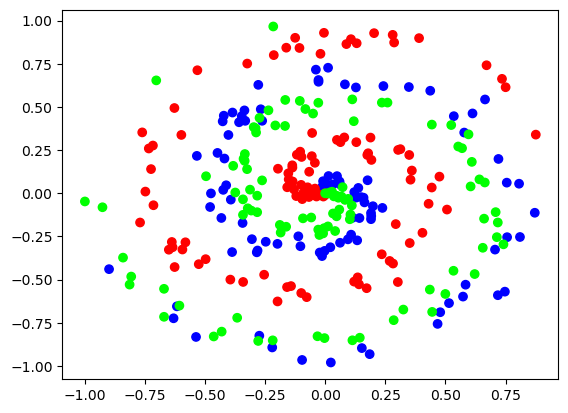

In [73]:
X,y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

## Construct the Dense Layer ##

In [48]:
class denseLayer:
    def __init__(self,inputs,neurons):
        self.weights = 0.01* np.random.randn(inputs,neurons)
        self.bias = np.zeros((1,neurons))

    def forward_prop(self,inputs):
        self.output = np.dot(inputs,self.weights)+ self.bias


# ACTIVATION LAYERS # 

### 1. ReLU Activation Function ###

In [49]:
class activateReLu:
    def forward_pass(self,inputs):
        self.output = np.maximum(0,inputs)

### 2. Softmax Activation Function ###

In [50]:
class activateSoftmax:
    def forward_pass(self,inputs):
        expVals = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        probs = expVals / np.sum(expVals,axis=1,keepdims=True)
        self.output = probs

### 3. Sigmoid Activation Function ###

In [51]:
class activateSigm:
    def forward_pass(self,inputs):
        exp_sum = 1 + np.exp(-(inputs))
        sig = 1/ exp_sum
        self.output = sig

In [52]:
X,y = spiral_data(samples=100, classes=3)

In [54]:
print(activate2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.3333333  0.33333332 0.33333338]
 [0.33333326 0.33333331 0.33333343]
 [0.33333332 0.33333333 0.33333335]
 [0.33333344 0.33333324 0.33333332]]


## Implementation of Categorical Cross Entropy Function ##

In [57]:
class Loss:
    def lossCal(self,output,y):
        sample_losses = self.forward_pass(output,y)
        data_loss = np.mean(sample_losses)

        return data_loss

In [63]:
class CategoricalCrossEntropyFunc(Loss) :
    def forward_pass(self,y_pred,y_true):
        samples = len(y_pred)
        y_pred_clip = np.clip(y_pred,1e-7,1-1e-7)

        if len(y_true.shape) ==1:
            correct_confidence = y_pred_clip[range(samples),y_true]

        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_true*y_pred_clip,axis=1)

        neg_likelihoods = -np.log(correct_confidence)
        return neg_likelihoods

In [64]:
dense = denseLayer(2,3)
dense.forward_prop(X)

activate = activateReLu()
activate.forward_pass(dense.output)

dense2 = denseLayer(3,3)
dense2.forward_prop(activate.output)

activate2 = activateSoftmax()
activate2.forward_pass(dense2.output)

# activate3 = activateSigm()
# activate3.forward_pass(activate2.output)

loss_func = CategoricalCrossEntropyFunc()
loss = loss_func.lossCal(activate2.output,y)
print(f'Loss : {loss}')

predictions = np.argmax(activate2.output,axis=1)
if len(y.shape) == 2:
    y = np.argmax(y,axis=1)
accuracy = np.mean(predictions == y)
print(f"Acc : {accuracy}")

Loss : 1.0986182911824875
Acc : 0.2833333333333333


## Time for some Optimization of weights and biases !!! ##

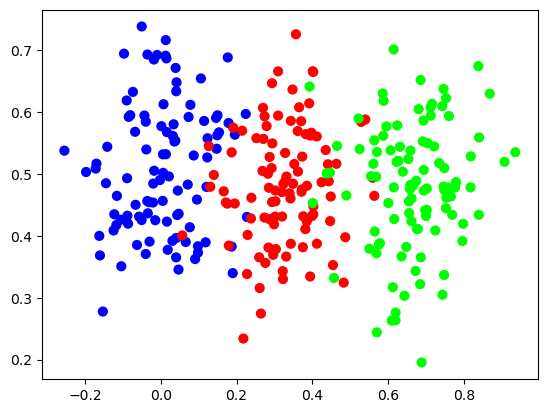

In [72]:
# Working on a Vertical dataset: Helps in understanding the optimization idea.....

from nnfs.datasets import vertical_data
nnfs.init()

X,y = vertical_data(samples=100,classes=3)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap='brg')
plt.show()

### Strategy 1: Randomly select weights and biases ###

In [83]:
X,y = vertical_data(samples=100,classes=3)

dense = denseLayer(2,3)
activate = activateReLu()
dense2 = denseLayer(3,3)
activate2 = activateSoftmax()
loss_func = CategoricalCrossEntropyFunc()

# Helper variables

lowest_loss = 999999
best_dense_weights = dense.weights.copy()
best_dense_bias = dense.bias.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_bias = dense2.bias.copy()

In [84]:
for iteration in range(100000):
    dense.weights = 0.05*np.random.randn(2,3)
    dense.bias = 0.05*np.random.randn(1,3)
    dense2.weights = 0.05*np.random.randn(3,3)
    dense2.bias = 0.05*np.random.randn(1,3)

    dense.forward_prop(X)
    activate.forward_pass(dense.output)
    dense2.forward_prop(activate.output)
    activate2.forward_pass(dense2.output)
    
    loss = loss_func.lossCal(activate2.output,y)
    
    
    predictions = np.argmax(activate2.output,axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    accuracy = np.mean(predictions == y)
    

    if loss < lowest_loss:
       print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
       best_dense_weights = dense.weights.copy()
       best_dense_bias = dense.bias.copy()
       best_dense2_weights = dense2.weights.copy()
       best_dense2_bias = dense2.bias.copy()
       lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0987567 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0987331 acc: 0.3333333333333333
New set of weights found, iteration: 7 loss: 1.098685 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0982025 acc: 0.3333333333333333
New set of weights found, iteration: 31 loss: 1.0977703 acc: 0.37
New set of weights found, iteration: 39 loss: 1.0971621 acc: 0.3333333333333333
New set of weights found, iteration: 379 loss: 1.0967411 acc: 0.3333333333333333
New set of weights found, iteration: 1980 loss: 1.0960659 acc: 0.3333333333333333
New set of weights found, iteration: 2307 loss: 1.0960076 acc: 0.3333333333333333
New set of weights found, iteration: 4564 loss: 1.0959377 acc: 0.3333333333333333
New set of weights found, iteration: 41331 loss: 1.0958711 acc: 0.3333333333333333
New set of weights found, iteration: 42387 loss: 1.0958526 acc: 0.3333333333333333
New set of weights found, iteration: 44316 lo

### Strategy 2: Randomly adjust weights and biases - Vertical Data ###

In [86]:
X,y = vertical_data(samples=100,classes=3)

dense = denseLayer(2,3)
activate = activateReLu()
dense2 = denseLayer(3,3)
activate2 = activateSoftmax()
loss_func = CategoricalCrossEntropyFunc()

# Helper variables

lowest_loss = 999999
best_dense_weights = dense.weights.copy()
best_dense_bias = dense.bias.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_bias = dense2.bias.copy()

In [88]:
for iteration in range(100000):
    dense.weights += 0.05*np.random.randn(2,3)
    dense.bias += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense2.bias += 0.05*np.random.randn(1,3)

    dense.forward_prop(X)
    activate.forward_pass(dense.output)
    dense2.forward_prop(activate.output)
    activate2.forward_pass(dense2.output)
    
    loss = loss_func.lossCal(activate2.output,y)
    
    
    predictions = np.argmax(activate2.output,axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    accuracy = np.mean(predictions == y)
    

    if loss < lowest_loss:
       print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
       best_dense_weights = dense.weights.copy()
       best_dense_bias = dense.bias.copy()
       best_dense2_weights = dense2.weights.copy()
       best_dense2_bias = dense2.bias.copy()
       lowest_loss = loss

    else:
        dense.weights = best_dense_weights.copy()
        dense.bias = best_dense_bias.copy() 
        dense2.weights = best_dense2_weights.copy()
        dense2.bias =  best_dense2_bias.copy() 

New set of weights found, iteration: 0 loss: 1.0982145 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.097612 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.097169 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0964098 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0941471 acc: 0.3333333333333333
New set of weights found, iteration: 27 loss: 1.0932764 acc: 0.3333333333333333
New set of weights found, iteration: 33 loss: 1.0921185 acc: 0.3333333333333333
New set of weights found, iteration: 34 loss: 1.0919861 acc: 0.3333333333333333
New set of weights found, iteration: 39 loss: 1.0895578 acc: 0.33
New set of weights found, iteration: 42 loss: 1.0857658 acc: 0.3333333333333333
New set of weights found, iteration: 45 loss: 1.0810505 acc: 0.38
New set of weights found, iteration: 50 loss: 1.0778155 acc: 0.4866666666666667
New set of weights found, iteration: 57 loss: 1.077759 acc: 0.38333333333

### Strategy 2: Randomly adjust weights and biases - Spiral Data ###

In [89]:
X,y = spiral_data(samples=100,classes=3)

dense = denseLayer(2,3)
activate = activateReLu()
dense2 = denseLayer(3,3)
activate2 = activateSoftmax()
loss_func = CategoricalCrossEntropyFunc()

# Helper variables

lowest_loss = 999999
best_dense_weights = dense.weights.copy()
best_dense_bias = dense.bias.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_bias = dense2.bias.copy()

In [90]:
for iteration in range(100000):
    dense.weights += 0.05*np.random.randn(2,3)
    dense.bias += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense2.bias += 0.05*np.random.randn(1,3)

    dense.forward_prop(X)
    activate.forward_pass(dense.output)
    dense2.forward_prop(activate.output)
    activate2.forward_pass(dense2.output)
    
    loss = loss_func.lossCal(activate2.output,y)
    
    
    predictions = np.argmax(activate2.output,axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    accuracy = np.mean(predictions == y)
    

    if loss < lowest_loss:
       print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
       best_dense_weights = dense.weights.copy()
       best_dense_bias = dense.bias.copy()
       best_dense2_weights = dense2.weights.copy()
       best_dense2_bias = dense2.bias.copy()
       lowest_loss = loss

    else:
        dense.weights = best_dense_weights.copy()
        dense.bias = best_dense_bias.copy() 
        dense2.weights = best_dense2_weights.copy()
        dense2.bias =  best_dense2_bias.copy() 

New set of weights found, iteration: 0 loss: 1.0990672 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0990428 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0987754 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.098597 acc: 0.3233333333333333
New set of weights found, iteration: 23 loss: 1.0983732 acc: 0.3333333333333333
New set of weights found, iteration: 27 loss: 1.0978973 acc: 0.39666666666666667
New set of weights found, iteration: 32 loss: 1.0976524 acc: 0.32
New set of weights found, iteration: 33 loss: 1.0974574 acc: 0.33666666666666667
New set of weights found, iteration: 37 loss: 1.0969291 acc: 0.39
New set of weights found, iteration: 41 loss: 1.096716 acc: 0.33666666666666667
New set of weights found, iteration: 42 loss: 1.0958693 acc: 0.37
New set of weights found, iteration: 43 loss: 1.0953698 acc: 0.37
New set of weights found, iteration: 45 loss: 1.0953366 acc: 0.31
New set of weights found, iterat